In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [16]:
# Load dataset
df = pd.read_csv('images_analyzed_productivity.csv')
# display first few rows
print(df.head())

   User  Age  Time  Coffee  Images_Analyzed Productivity
0     1   23   800       0               20         Good
1     1   23  1700       0               18         Good
2     2   65   900       1               15          Bad
3     3   34  1000       2               22         Good
4     4   28  1400       1               16          Bad


In [17]:
# check the distribution of the target variable
size = df['Productivity'].value_counts(sort=True)
print(size)

Productivity
Good    49
Bad     31
Name: count, dtype: int64


In [18]:
# drop irrelevant columns
df.drop(['Images_Analyzed','User'],axis=1,inplace=True)
# view the updated dataframe
print(df.head())

   Age  Time  Coffee Productivity
0   23   800       0         Good
1   23  1700       0         Good
2   65   900       1          Bad
3   34  1000       2         Good
4   28  1400       1          Bad


In [19]:
# handle missing values
df.dropna(inplace=True)
print(df.isnull().sum())

Age             0
Time            0
Coffee          0
Productivity    0
dtype: int64


In [20]:
# convert non - numeric columns to numeric
df['Productivity'] = df['Productivity'].map({'Good': 1, 'Bad': 0 })
print(df.dtypes)
print(df.head())

Age             int64
Time            int64
Coffee          int64
Productivity    int64
dtype: object
   Age  Time  Coffee  Productivity
0   23   800       0             1
1   23  1700       0             1
2   65   900       1             0
3   34  1000       2             1
4   28  1400       1             0


In [44]:
# define Independent(X) and Dependent variables(Y)
y = df['Productivity'].astype(int) # y is int type
x = df.drop('Productivity',axis=1)

# verify the data shapes
print( 'x shape:', x.shape )
print( 'y shape:', y.shape )

x shape: (80, 3)
y shape: (80,)


In [41]:
# split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24) # 70% training and 30% test
print( 'x_train shape:', x_train.shape )
print( 'x_test shape:', x_test.shape )

x_train shape: (56, 3)
x_test shape: (24, 3)


In [42]:
# train the random forest model (classifier)
model = RandomForestClassifier(n_estimators=10, random_state=24)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=24)

In [43]:
# make predictions
predictions = model.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 66.67%


In [45]:
# analyze feature importance
feature_list  = x.columns

importances = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print("Feature importances:")
print(importances)

Feature importances:
Age       0.539222
Time      0.365973
Coffee    0.094805
dtype: float64


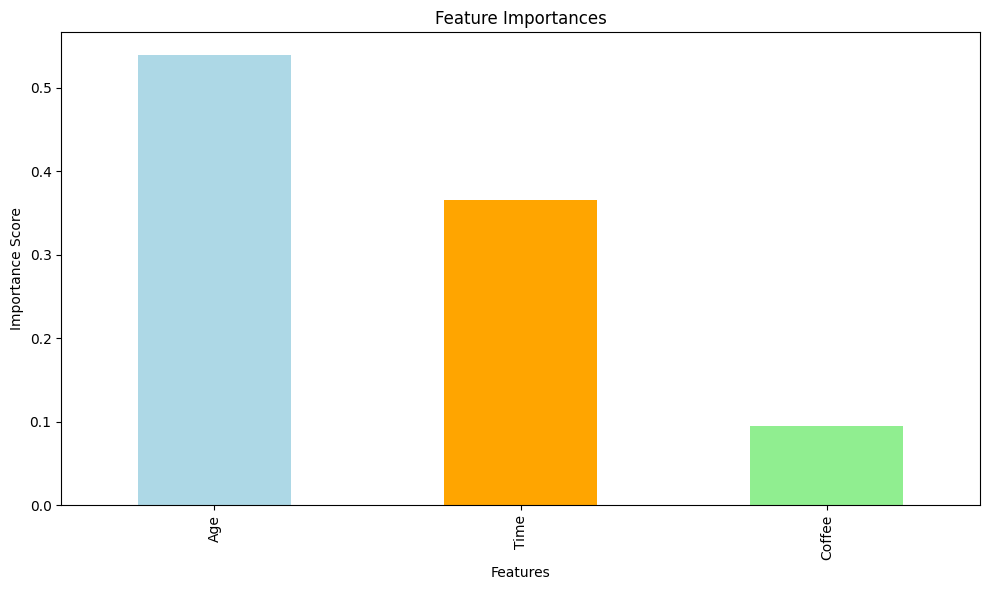

In [46]:
feature_list  = x.columns
importances = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.plot(kind='bar' , color=['lightblue','orange','lightgreen'])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()
